In [ ]:
!cp -rf '/content/drive/My Drive/datasets/dog-breed-identification' '/content'

In [ ]:
import tensorflow as tf
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
df_label = pd.read_csv('/content/dog-breed-identification/labels.csv')

In [ ]:
df_label.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [ ]:
label_name = df_label['breed'].sort_values().unique()

In [ ]:
label_name

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [ ]:
encoder = LabelEncoder()

In [ ]:
encoder.fit(df_label['breed'])
df_label['breed'] = encoder.transform(df_label['breed'])
df_label['breed'] = df_label['breed'].astype(str)

In [ ]:
df_label['id'] = df_label['id'] + '.jpg'

In [ ]:
df_label.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07.jpg,19
1,001513dfcb2ffafc82cccf4d8bbaba97.jpg,37
2,001cdf01b096e06d78e9e5112d419397.jpg,85
3,00214f311d5d2247d5dfe4fe24b2303d.jpg,15
4,0021f9ceb3235effd7fcde7f7538ed62.jpg,49


In [ ]:
train_dir = '/content/dog-breed-identification/train'
batch_size=256

In [ ]:
train_datagen = ImageDataGenerator(rescale=1/255.,
                                   rotation_range=20,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True,
                                   fill_mode='nearest',
                                   validation_split=0.2)

val_datagen = ImageDataGenerator(rescale=1/255.,
                                 validation_split=0.2)

In [ ]:
train_generator = train_datagen.flow_from_dataframe(dataframe=df_label,
                                              directory=train_dir,
                                              x_col='id',
                                              y_col='breed',
                                              target_size=(150,150),
                                              class_mode='categorical',
                                              batch_size=batch_size,
                                              subset='training',
                                              seed=7)
 
validation_generator = val_datagen.flow_from_dataframe(dataframe=df_label,
                                             directory=train_dir,
                                             x_col='id',
                                             y_col='breed',
                                             target_size=(150,150),
                                             class_mode='categorical',
                                             batch_size=batch_size,
                                             subset='validation',
                                             seed=7)

Found 8178 validated image filenames belonging to 120 classes.
Found 2044 validated image filenames belonging to 120 classes.


In [ ]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

In [ ]:
conv_base.trainable = False

In [ ]:
from tensorflow.keras import layers, models, optimizers

In [ ]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(120, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['accuracy'])

In [ ]:
checkpoint_filepath = 'dog-breed-identification.h5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=len(train_generator) - 1,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=len(validation_generator) - 1,
      callbacks=[model_checkpoint_callback])

Epoch 1/100
31/31 [==============================] - 66s 2s/step - loss: 4.9695 - accuracy: 0.0087 - val_loss: 4.8182 - val_accuracy: 0.0078
Epoch 2/100
31/31 [==============================] - 65s 2s/step - loss: 4.8507 - accuracy: 0.0107 - val_loss: 4.7837 - val_accuracy: 0.0078
Epoch 3/100
31/31 [==============================] - 65s 2s/step - loss: 4.8052 - accuracy: 0.0107 - val_loss: 4.7744 - val_accuracy: 0.0112
Epoch 4/100
31/31 [==============================] - 63s 2s/step - loss: 4.7830 - accuracy: 0.0119 - val_loss: 4.7632 - val_accuracy: 0.0156
Epoch 5/100
31/31 [==============================] - 63s 2s/step - loss: 4.7693 - accuracy: 0.0146 - val_loss: 4.7556 - val_accuracy: 0.0190
Epoch 6/100
31/31 [==============================] - 63s 2s/step - loss: 4.7632 - accuracy: 0.0121 - val_loss: 4.7510 - val_accuracy: 0.0173
Epoch 7/100
31/31 [==============================] - 63s 2s/step - loss: 4.7524 - accuracy: 0.0163 - val_loss: 4.7459 - val_accuracy: 0.0212
Epoch 8/100
3

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

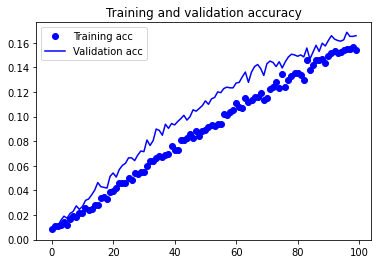

In [ ]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.show()

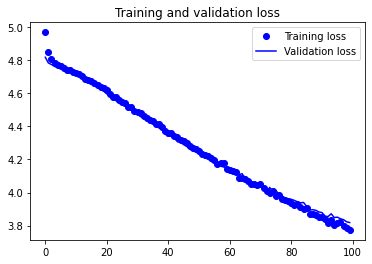

In [ ]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
df_submit = pd.read_csv('/content/dog-breed-identification/sample_submission.csv')

In [ ]:
df_submit.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,doberman,...,norwegian_elkhound,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
1,00102ee9d8eb90812350685311fe5890,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
2,0012a730dfa437f5f3613fb75efcd4ce,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
3,001510bc8570bbeee98c8d80c8a95ec1,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333

In [ ]:
import numpy as np
from tqdm import tqdm
import cv2

In [ ]:
width = 150

n_test = len(df_submit)
X_test = np.zeros((n_test, width, width, 3))

for i in tqdm(range(n_test)):
    X_test[i] = cv2.resize(
        cv2.imread('/content/dog-breed-identification/test/%s.jpg' % df_submit['id'][i]),
        (width, width))
    
X_test /= 255.

100%|██████████| 10357/10357 [00:33<00:00, 311.12it/s]


In [ ]:
y_pred = model.predict(X_test, batch_size=128)

In [ ]:
class_to_num = dict(zip(label_name, range(120)))

In [ ]:
df_submit.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,doberman,...,norwegian_elkhound,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
1,00102ee9d8eb90812350685311fe5890,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
2,0012a730dfa437f5f3613fb75efcd4ce,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
3,001510bc8570bbeee98c8d80c8a95ec1,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333

In [ ]:
for name in label_name:
    df_submit[name] = y_pred[:,class_to_num[name]]

In [ ]:
df_submit.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,doberman,...,norwegian_elkhound,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,0.001774,0.027142,0.007003,0.013459,0.008311,0.008442,0.002667,0.004276,0.002357,0.002172,0.011906,0.010677,0.019726,0.006566,0.002001,0.002650,0.004184,0.010705,0.007880,0.027905,0.001440,0.008141,0.003732,0.001574,0.013008,0.034688,0.010475,0.015063,0.003164,0.003264,0.006623,0.013390,0.002230,0.001771,0.008246,0.005009,0.008273,0.022859,0.008837,...,0.000580,0.001327,0.003287,0.005802,0.013778,0.003578,0.026521,0.001644,0.013005,0.014633,0.001502,0.005934,0.001118,0.004494,0.001141,0.002478,0.000952,0.002268,0.010977,0.011053,0.000706,0.006371,0.006234,0.018669,0.008236,0.004712,0.017152,0.004406,0.008205,0.025337,0.010316,0.006650,0.072663,0.007309,0.007020,0.001029,0.000672,0.005983,0.002323,0.005540
1,00102ee9d8eb90812350685311fe5890,0.000333,0.000376,0.002870,0.007938,0.100224,0.000237,0.000937,0.011201,0.001436,0.000171,0.000114,0.004822,0.000319,0.000903,0.006432,0.003609,0.000191,0.002099,0.000773,0.000234,0.041092,0.016759,0.002815,0.000645,0.000095,0.000395,0.000399,0.001246,0.002761,0.001348,0.001208,0.001921,0.001685,0.000320,0.001075,0.001260,0.000448,0.001776,0.000679,...,0.003734,0.000160,0.001528,0.023277,0.002562,0.000521,0.000722,0.015533,0.004130,0.026782,0.000606,0.119629,0.006319,0.003492,0.006829,0.000288,0.000861,0.000381,0.001639,0.023788,0.006503,0.010633,0.000319,0.027967,0.010163,0.020817,0.070557,0.001166,0.000724,0.001184,0.002145,0.000389,0.000785,0.005098,0.090860,0.008371,0.001136,0.000820,0.000883,0.007739
2,0012a730dfa437f5f3613fb75efcd4ce,0.006030,0.021752,0.017984,0.003686,0.007092,0.007149,0.007905,0.003500,0.005983,0.017739,0.010352,0.005463,0.012700,0.006815,0.003059,0.005541,0.003695,0.004245,0.004797,0.005601,0.008674,0.007626,0.005327,0.014659,0.007840,0.008853,0.007969,0.005572,0.003468,0.018663,0.015705,0.003800,0.001693,0.007662,0.007145,0.012891,0.016918,0.006510,0.014513,...,0.006365,0.011160,0.004006,0.006693,0.005915,0.014662,0.042928,0.007585,0.005299,0.003999,0.006205,0.004351,0.004313,0.002208,0.003863,0.008473,0.013277,0.004160,0.006691,0.002473,0.005425,0.005417,0.020618,0.007230,0.003406,0.002815,0.006175,0.003916,0.003548,0.008207,0.008259,0.003823,0.004889,0.008882,0.008674,0.002969,0.004982,0.038673,0.014577,0.009459
3,001510bc8570bbeee98c8d80c8a95ec1,0.006127,0.057419,0.006812,0.005101,0.006975,0.006427,0.008317,0.008774,0.024133,0.015497,0.003260,0.002887,0.004708,0.005037,0.005431,0.004409,0.013866,0.004652,0.007219,0.004636,0.004245,0.009633,0.012479,0.002170,0.006088,0.006516,0.004071,0.010249,0.004770,0.004376,0.010796,0.013169,0.001991,0.009767,0.015395,0.007884,0.003379,0.006160,0.004464,...,0.012545,0.014781,0.000980,0.005813,0.005548,0.008003,0.006337,0.028158,0.003184,0.002739,0.008944,0.004444,0.021209,0.005067,0.012545,0.004343,0.016361,0.001958,0.008236,0.005375,0.002201,0.008023,0.003053,0.002983,0.004512,0.005587,0.004890,0.008351

In [ ]:
df_submit.to_csv('submission.csv', index=None)